# Portfolio 1
Student Name: **Chi Thanh Liu**  
StudentID: **45728046**   
URL: (https://github.com/MQCOMP2200-S2-2020/portfolio-2020-Thanh-Liu)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [3]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [4]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [5]:
combine_df = strava.join(cheetah, on='date', how = 'inner')
print(combine_df.shape)
combine_df.head()

(243, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## The requirement No.1:

In [6]:
# Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
final_df = combine_df.drop(combine_df.index[(combine_df.device_watts == False)])
print(final_df.shape)
final_df.head()


(209, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


## The requirement No.2:

Text(0.5, 1.0, 'The Average Speed histogram')

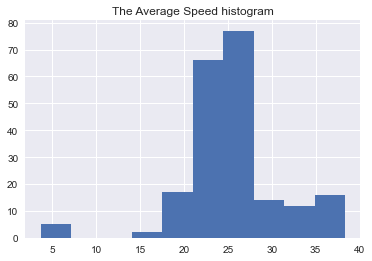

In [7]:
final_df['Average Speed'].hist()
plt.title('The Average Speed histogram')
#The Average Speed from final_df is normally distributed. 
#Although it has some outliers, it does not impact signficantly on the histogram.

Text(0.5, 1.0, 'The histogram of Average Power')

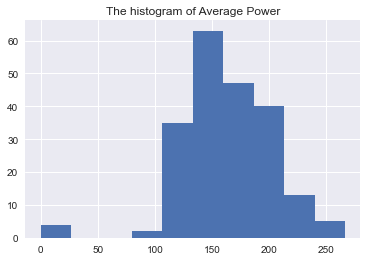

In [8]:
final_df['Average Power'].hist()
plt.title('The histogram of Average Power')
#The histogram of Average Power is also the same with Average Speed.
# It is normally distributed.
# Although it has some outliers, it does not influence too much on the histogram.

Text(0.5, 1.0, 'The TSS histogram')

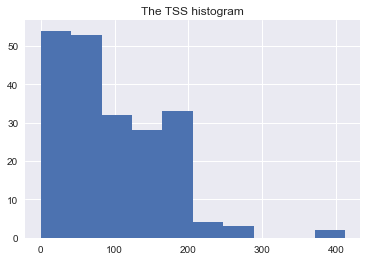

In [9]:
final_df['TSS'].hist()
plt.title('The TSS histogram')
#The histogram of TSS is not normally distributed.
#It may be skewed left.

Text(0.5, 1.0, 'The histogram of Distance')

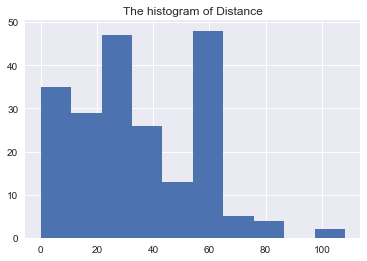

In [10]:
final_df['distance'].hist()
plt.title('The histogram of Distance')
#The histogram of Distance in final_df is skewed right.

Text(0.5, 1.0, 'The histogram of Moving_time')

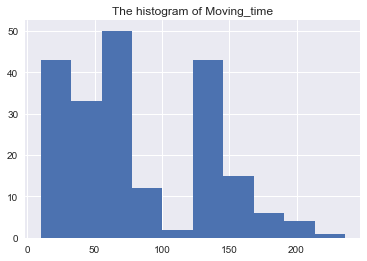

In [11]:
final_df['moving_time'].hist()
plt.title('The histogram of Moving_time')
#The histogram is not normally distributed. It is skewed right.

Text(0.5, 1.0, 'The histogram of Elapsed_time')

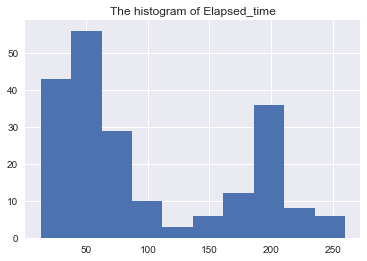

In [12]:
final_df['elapsed_time'].hist()
plt.title('The histogram of Elapsed_time')
#The histogram is not normally distributed. It is skewed right.

## The requirement No.3:

In [13]:
final_df.corr()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
average_heartrate,1.000000,-0.062079,0.672457,0.114595,-0.093374,0.387071,-0.048611,0.636597,0.636595,0.130312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593091,0.593092,0.113775
average_temp,-0.062079,1.000000,-0.275660,0.051771,0.085515,0.001101,0.104961,-0.209984,-0.209984,0.014060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.198613,-0.198615,0.015503
average_watts,0.672457,-0.275660,1.000000,0.031858,-0.161617,0.245937,-0.112507,0.885686,0.885685,0.183106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772574,0.772574,0.150163
distance,0.114595,0.051771,0.031858,1.000000,0.896884,0.753808,0.939383,0.242217,0.242219,0.908585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270703,0.270705,0.922565
elapsed_time,-0.093374,0.085515,-0.161617,0.896884,1.000000,0.658846,0.975316,-0.049260,-0.049258,0.798056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005559,0.005560,0.825980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rest HF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV Recovery Points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP,0.593091,-0.198613,0.772574,0.270703,0.005559,0.353419,0.044431,0.977584,0.977584,0.435185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.432286
IF,0.593092,-0.198615,0.772574,0.270705,0.005560,0.353420,0.044433,0.977584,0.977584,0.435186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.432287


## Comment on the results of the third requirement:
1. When moving_time increases, the distance and TSS also increase. It is a positive correlation.
* The longer distance is, the higher TSS is. It is positive correlation.
* The Average Speed increases, the average_hearthrate, the average_watts, and NP would rise. It is a positive correlation.
   * The Average Speed increases, the moving_time would decrease. It is a negative correlation. 
* The Hearth Rate grows, the average_watts and the NP would increase. It is a positive correlation.
   * The Hearth Rate increases, the moving_time would decrease because you run fastly, the moving_time will decrease. It is negative correlation.
* The higher average_watts is, the more increased of NP is. It is a positive correlation.
* The NP rises, the TSS and the distance also increase. It is a positive correlation.

   

## The requirement No.4:

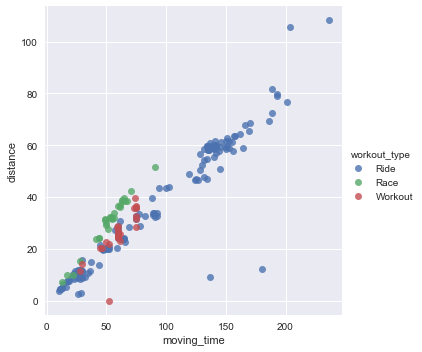

In [14]:
import seaborn as sns
sns.lmplot( x = 'moving_time', y = 'distance' , data = final_df,fit_reg = False,  hue = 'workout_type')

Text(0.5, 1.0, 'The Moving_Time histogram of Race')

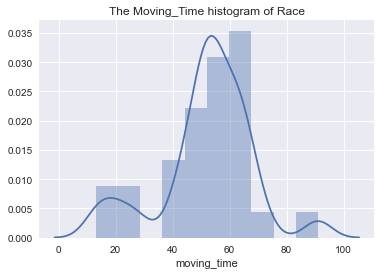

In [15]:
race_data = final_df.drop(final_df.index[(final_df.workout_type == 'Ride') | (final_df.workout_type == 'Workout')])
sns.distplot(race_data.moving_time)
plt.title('The Moving_Time histogram of Race')

Text(0.5, 1.0, 'The Moving_Time histogram of Ride')

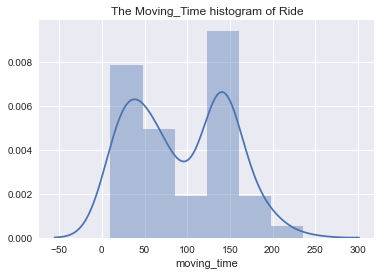

In [16]:
ride_data = final_df.drop(final_df.index[(final_df.workout_type == 'Race') | (final_df.workout_type == 'Workout')])
sns.distplot(ride_data.moving_time)
plt.title('The Moving_Time histogram of Ride')

Text(0.5, 1.0, 'The Moving_Time histogram of Workout')

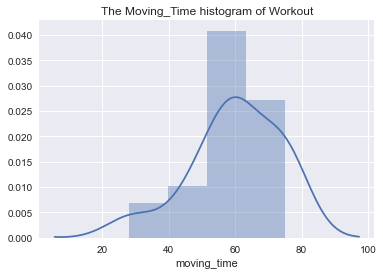

In [17]:
workout_data = final_df.drop(final_df.index[(final_df.workout_type == 'Ride') | (final_df.workout_type == 'Race')])
sns.distplot(workout_data.moving_time)
plt.title('The Moving_Time histogram of Workout')

## Comment on the requirement number 4:
In this fourth requirement, I have chosen the moving_time and distance which belong to each workout_type, and display these data on scatter plot with different categories (Ride, Race, Workout). We can see that the number of Ride is the highest. Race and Workout do not have too much the quantity as same as Ride. However, the moving_timeand distance of three categories has the same tendency. It means that when the moving_time increases, the distance also grows. Although these three categories also have some outliers, these outliers do not impact significantly on the whole result.

I also present the moving_time of three categories on three different histograms to see the different distributions of the moving_time for each type. The first histogram displays the moving_time of Race. It is normally distributed. As I said before, even though it has some outliners, it does not influence significantly. The second histogram and third histograms are Ride and Workout categories, respectively. They are not normally distributed. The Ride histogram is skewed right, and the other one is skewed left. While the moving_time of Workout and Race seems to be the same, the moving_time of Ride is different. The highest moving_time of Ride is approximately 250, while the lowest is nearly 0. 


## The requirement No.5:


In [18]:
weather2018 = pd.read_csv('data/weather_data_2018.csv')
a = ['Year', 'Month', 'Day']
weather2018['date'] = pd.to_datetime(weather2018[a])
weather2018 = weather2018.set_index('date')
weather2018.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
date,,,,,,,,
2018-01-01,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
2018-01-02,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2018-01-03,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
2018-01-04,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
2018-01-05,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y


In [19]:
weather2019 = pd.read_csv('data/weather_data_2019.csv')
b = ['Year', 'Month', 'Day']
weather2019['date']= pd.to_datetime(weather2019[b])
weather2019 = weather2019.set_index('date')
weather2019.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
date,,,,,,,,
2019-01-01,IDCJAC0010,66212,2019,1,1,34.0,1.0,Y
2019-01-02,IDCJAC0010,66212,2019,1,2,30.6,1.0,Y
2019-01-03,IDCJAC0010,66212,2019,1,3,28.9,1.0,Y
2019-01-04,IDCJAC0010,66212,2019,1,4,33.7,1.0,Y
2019-01-05,IDCJAC0010,66212,2019,1,5,39.3,1.0,Y


In [20]:
temperature1 = pd.DataFrame(weather2018['Maximum temperature (Degree C)'])
temperature2 = pd.DataFrame(weather2019['Maximum temperature (Degree C)'])
result =temperature1.append(temperature2)
result.tail()
combine_df.index = combine_df.index.tz_localize(None)

In [21]:
combine_df['col_date'] = pd.to_datetime(combine_df['date'], errors='coerce')
combine_df = combine_df.set_index('col_date')
final_dff = combine_df.join(result,how = 'inner')
print(final_dff.shape)
final_dff.head()

(243, 373)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,Maximum temperature (Degree C)
2018-01-28,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,222.856,0.83155,20.2257,30.7
2018-01-28,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,245.365,0.91554,94.5787,30.7
2018-02-01,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0.000,0.00000,0.0000,24.3
2018-02-06,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,253.702,0.94665,98.3269,28.2
2018-02-07,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,232.644,0.86808,171.0780,28.1


In [22]:
c = final_dff['Average Speed'].corr(final_dff['Maximum temperature (Degree C)'])
print('The relationship between Average Speed and Temperature:',c)
d = final_dff['Maximum temperature (Degree C)'].corr(final_dff['distance'])
print('The relationship between Distance and Temperature:',d)

The relationship between Average Speed and Temperature: -0.06268627624726446
The relationship between Distance and Temperature: 0.015474655032152725


### Comment on question 5:
In the final requirement, I have been asked to join the temperature dataframe with the cycling data and find the relationship between *distance*, *Average speed* and *temperature*:

  * The relationship between distance and temperature is positive relationship. However, the value is 0.015, it is very small. It means that when the distance increases, the temperature also increase.
  * The relationship between Average Speed and temperature is negative relationship. The values is -0.063. It means that when the temperature is increased, the average speed will be decreased.

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.
